<a href="https://colab.research.google.com/github/robiulislam1999/CSE718/blob/main/chap06_file02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Examples**

Proportional Growth

In [1]:
# install Pint if necessary
try:
    import pint
except ImportError:
    !pip install pint
# download modsim.py if necessary
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')
# import functions from modsim
from modsim import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.0/305.0 kB 6.0 MB/s eta 0:00:00
Downloaded modsim.py


In [2]:
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/data/World_population_estimates.html')

Downloaded World_population_estimates.html


In [3]:
from pandas import read_html
filename = 'World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
table3 = tables[2]
table3.columns = ['census', 'prb', 'un', 'maddison',
                  'hyde', 'tanton', 'biraben', 'mj',
                  'thomlinson', 'durand', 'clark']

System Objects

In [4]:
un = table3.un / 1e9
census = table3.census / 1e9
t_0 = census.index[1]
t_end = census.index[-2]
elapsed_time = t_end - t_0
p_0 = census[t_0]
p_end = census[t_end]
total_growth = p_end - p_0
annual_growth = total_growth / elapsed_time
system = System(t_0=t_0,
                t_end=t_end,
                p_0=p_0,
                annual_growth=annual_growth)
show(system)

,value
t_0,1951.000000
t_end,2015.000000
p_0,2.594940
annual_growth,0.072702


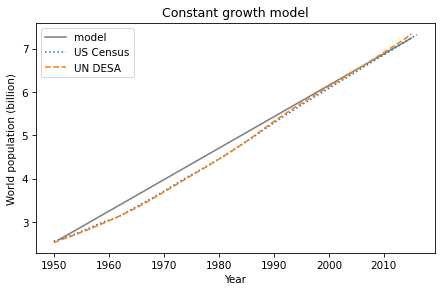

In [5]:
def run_simulation1(system):
    results = TimeSeries()
    results[system.t_0] = system.p_0

    for t in range(system.t_0, system.t_end):
        results[t+1] = results[t] + system.annual_growth

    return results
results1 = run_simulation1(system)
def plot_estimates():
    census.plot(style=':', label='US Census')
    un.plot(style='--', label='UN DESA')
    decorate(xlabel='Year',
             ylabel='World population (billion)')
results1.plot(label='model', color='gray')
plot_estimates()
decorate(title='Constant growth model')

Proportional Growth Model

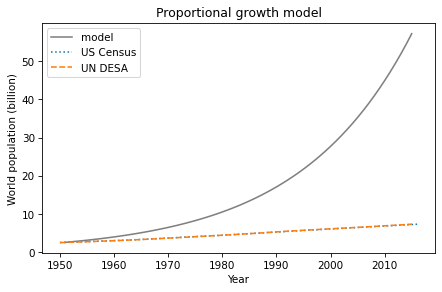

In [6]:
def run_simulation2(system):
    results = TimeSeries()
    results[system.t_0] = system.p_0

    for t in range(system.t_0, system.t_end):
        births = system.birth_rate * results[t]
        deaths = system.death_rate * results[t]
        results[t+1] = results[t] + births - deaths

    return results
system.death_rate = 2.5 / 1000
system.birth_rate = 52 / 1000
results2 = run_simulation2(system)
results2.plot(label='model', color='gray')
plot_estimates()
decorate(title='Proportional growth model')

Factoring Out the Update Function

In [7]:
def growth_func1(t, pop, system):
    births = system.birth_rate * pop
    deaths = system.death_rate * pop
    return births - deaths
def run_simulation(system, growth_func):
    results = TimeSeries()
    results[system.t_0] = system.p_0

    for t in range(system.t_0, system.t_end):
        growth = growth_func(t, results[t], system)
        results[t+1] = results[t] + growth

    return results
results = run_simulation(system, growth_func1)
results

Time
1951     2.594940
1952     2.723389
1953     2.858197
1954     2.999678
1955     3.148162
          ...    
2011    47.105745
2012    49.437479
2013    51.884634
2014    54.452924
2015    57.148344
Name: Quantity, Length: 65, dtype: float64

Combining Birth and Death

In [8]:
system.alpha = system.birth_rate - system.death_rate
def growth_func2(t, pop, system):
    return system.alpha * pop
results = run_simulation(system, growth_func2)
results

Time
1951     2.594940
1952     2.723389
1953     2.858197
1954     2.999678
1955     3.148162
          ...    
2011    47.105745
2012    49.437479
2013    51.884634
2014    54.452924
2015    57.148344
Name: Quantity, Length: 65, dtype: float64

**Exercise**

Exercise 1

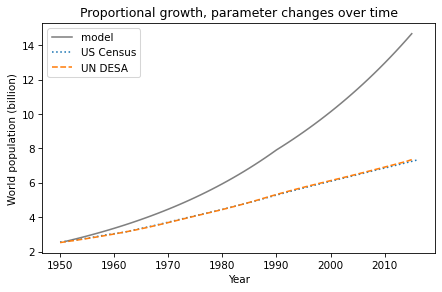

In [9]:
def update(t,pop,system):
  if t < 1990:
    return system.alpha1 * pop
  else:
    return system.alpha2 * pop
system.alpha1 = 29 / 1000
system.alpha2 = 25 / 1000
finalres = run_simulation(system, update)
finalres.plot(label='model', color='gray')
plot_estimates()
decorate(title='Proportional growth, parameter changes over time')